In [1]:
import pyperclip
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def computeSkew(a: str, b: str, sequence: str):
  skew = np.zeros(len(sequence) + 1)
  for i in range(len(sequence)):
      if sequence[i] == a:
          skew[i + 1] = skew[i] + 1
      elif sequence[i] == b:
          skew[i + 1] = skew[i] - 1
      else:
          skew[i + 1] = skew[i]
  return skew


def findOri(sequence: str):
  skew = computeSkew("G", "C", sequence)
  minSkew = np.min(skew)
  ori = np.where(skew == minSkew)[0]
  return ori


def plotSkew(sequence: str):
  skew = computeSkew("G", "C", sequence)
  plt.plot(skew)
  plt.show()

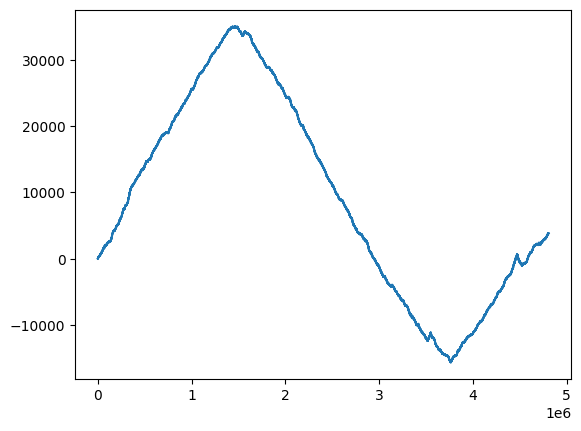

[3764856 3764858]


In [14]:
text = open("salmonella_enterica.txt", "r")
sequence = text.read().strip()
k = 9
d = 1

plotSkew(sequence)
print(findOri(sequence))

In [15]:
ori = int(findOri(sequence)[0] + ((findOri(sequence)[1] - findOri(sequence)[0]) / 2))
oriWindow = (int(ori - 250), int(ori + 250))

ori, oriWindow

(3764857, (3764607, 3765107))

In [18]:
window = sequence[oriWindow[0]:oriWindow[1]]

window, len(window)

('CGATCAATGGCAGACATTACTCTTATCAGCGGCAGCACCCTGGGCGGCGCCGAATACGTCGCGGAACATCTGGCGGAAAAGCTGGAAGCTGCCGGTTTTTCAACCGAAACGGTGCACGGTCCGTTATTAGAGGATCTGTCAACTTCCGGGATCTGGCTGATAATCAGCTCAACGCACGGCGCCGGAGACATTCCGGACAACCTGACCCCTTTCTATGAAGACCTTCAGACGCAGAAACCCGATCTTTCCGCGGTACGTTTCGGCGCAATTGGCATTGGCAGTCGAGAATACGACACGTTTTGCGGCGCGATTGAGAAAATAGAAGCGGAACTGAAAGGCGCTGGCGCAAAACAGGTTGGGGAAACACTGAAGATCAACATCCTTGAACATGAGATTCCGGAAGATCCAGCGGAGATTTGGCTCGGATCCTGGATTAATTTACTCAAATAAGTGTAAAGATCGTGCGATCTATTGTGGATAAATATGGTGAAAAGCTTGGA',
 500)

In [19]:
def MaxMap(freqMap: dict):
    maximum = 0
    for key in freqMap.keys():
        if freqMap[key] > maximum:
            maximum = freqMap[key]
    return maximum


def immediateNeighbors(pattern):
    neighborhood = []
    for i in range(len(pattern)):
        symbol = pattern[i]
        for nucleotide in 'ACGT':
            if nucleotide != symbol:
                neighbor = pattern[:i] + nucleotide + pattern[i+1:]
                neighborhood.append(neighbor)
    return neighborhood


dnaDict = {
    "A": "T", 
    "T": "A", 
    "C": "G", 
    "G": "C"
}

def dnaCompliment(sequence: str):
    compliment = ""
    sequence = sequence.strip()
    for char in sequence:
        compliment += dnaDict[char]
    compliment = compliment[::-1]
    return compliment


def iterativeNeighbors(pattern, d):
    neighborhood = {pattern}
    for j in range(d):
        for text in neighborhood.copy():
            neighborhood = neighborhood.union(immediateNeighbors(text))
    return neighborhood


def frequentWordsWithMismatches(text, k, d):
    Patterns = []
    freqMap = {}
    n = len(text)

    for i in range(n - k + 1):
        pattern = text[i:i + k]
        neighborhood = iterativeNeighbors(pattern, d)

        for neighbor in neighborhood:
            if neighbor not in freqMap:
                freqMap[neighbor] = 1
            else:
                freqMap[neighbor] += 1


            complement = dnaCompliment(neighbor)
            if complement not in freqMap:
                freqMap[complement] = 1
            else:
                freqMap[complement] += 1

    maxCount = MaxMap(freqMap)

    for pattern in freqMap.keys():
        if freqMap[pattern] == maxCount:
            Patterns.append(pattern)

    return Patterns

In [22]:
patterns = frequentWordsWithMismatches(window, k, d)
patterns = " ".join(patterns)
pyperclip.copy(patterns)

patterns

'CCGGAAGCT AGCTTCCGG'